In [52]:
import os
from dotenv import load_dotenv
load_dotenv()
from typing import List, Annotated
from pydantic import BaseModel
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.chat_models import init_chat_model
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_core.documents import Document
from langgraph.graph import StateGraph, END

embeddings= HuggingFaceEmbeddings()
llm = init_chat_model("groq:openai/gpt-oss-20b")

In [53]:
# Document Processing

urls = [
    "https://docs.langchain.com/oss/python/langchain/overview",
    "https://docs.langchain.com/oss/python/langchain/quickstart",
    "https://docs.langchain.com/oss/python/langchain/retrieval"
]

loaders = [WebBaseLoader(url) for url in urls]
docs = []

for loader in loaders:
    docs.extend(loader.load())

docs

[Document(metadata={'source': 'https://docs.langchain.com/oss/python/langchain/overview', 'title': 'LangChain overview - Docs by LangChain', 'language': 'en'}, page_content='LangChain overview - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...⌘KGitHubTry LangSmithTry LangSmithSearch...NavigationLangChain overviewLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewLangChain v1.0Release notesMigration guideGet startedInstallQuickstartPhilosophyCore componentsAgentsModelsMessagesToolsShort-term memoryStreamingStructured outputMiddlewareOverviewBuilt-in middlewareCustom middlewareAdvanced usageGuardrailsRuntimeContext engineeringModel Context Protocol (MCP)Human-in-the-loopMulti-agentRetrievalLong-term memoryUse in productionStudioTestDeployAgent Chat UIObservabilityOn this page Install Create an agent Core benefitsLangChain overviewCopy pageCopy pageLangChain v1.0 is now available!For a complete list of changes and i

In [54]:
# Chunking

splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

chunks = splitter.split_documents(docs)

vectorstore = FAISS.from_documents(chunks, embeddings)
retriever = vectorstore.as_retriever()

In [55]:
retriever.invoke("What is Langchain")

[Document(id='e3d62de0-b3e2-4dff-8a85-10211da52a3e', metadata={'source': 'https://docs.langchain.com/oss/python/langchain/overview', 'title': 'LangChain overview - Docs by LangChain', 'language': 'en'}, page_content='LangChain overview - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...⌘KGitHubTry LangSmithTry LangSmithSearch...NavigationLangChain overviewLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewLangChain v1.0Release notesMigration guideGet startedInstallQuickstartPhilosophyCore componentsAgentsModelsMessagesToolsShort-term memoryStreamingStructured outputMiddlewareOverviewBuilt-in middlewareCustom middlewareAdvanced usageGuardrailsRuntimeContext engineeringModel Context Protocol (MCP)Human-in-the-loopMulti-agentRetrievalLong-term memoryUse in productionStudioTestDeployAgent Chat UIObservabilityOn this page Install Create an agent Core benefitsLangChain overviewCopy pageCopy pageLangChain v1.0 is now ava

In [56]:
from langchain_core.tools.retriever import create_retriever_tool

retriever_tool= create_retriever_tool(
    retriever,
    "retriever_vector_db_blog",
    "Search and run information about Langchain"
)

retriever_tool

Tool(name='retriever_vector_db_blog', description='Search and run information about Langchain', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000001B0FA4C2700>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001B0D07E7410>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x000001B0D078FEC0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001B0D07E7410>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_co

Creating a separate vector store for storing Langgraph blogs

In [57]:
urls = [
    "https://docs.langchain.com/oss/python/langgraph/use-graph-api#map-reduce-and-the-send-api",
    "https://docs.langchain.com/oss/python/langgraph/overview",
    "https://docs.langchain.com/oss/python/langgraph/local-server#python-sdk-async"
]

loaders = [WebBaseLoader(url) for url in urls]
docs = []

for loader in loaders:
    docs.extend(loader.load())

docs

[Document(metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/use-graph-api#map-reduce-and-the-send-api', 'title': 'Use the graph API - Docs by LangChain', 'language': 'en'}, page_content='Use the graph API - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...⌘KGitHubTry LangSmithTry LangSmithSearch...NavigationGraph APIUse the graph APILangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewLangGraph v1.0Release notesMigration guideGet startedInstallQuickstartLocal serverThinking in LangGraphWorkflows + agentsCapabilitiesPersistenceDurable executionStreamingInterruptsTime travelMemorySubgraphsProductionApplication structureStudioTestDeployAgent Chat UIObservabilityLangGraph APIsGraph APIGraph APIUse the graph APIFunctional APIRuntimeOn this pageSetupDefine and update stateDefine stateUpdate stateProcess state updates with reducersMessagesStateBypass reducers with OverwriteDefine input and output schemas

In [58]:

splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

chunks = splitter.split_documents(docs)

vectorstorelanggraph = FAISS.from_documents(chunks, embeddings)
retrieverlanggraph = vectorstorelanggraph.as_retriever()

In [59]:
retriever_tool_langgraph = create_retriever_tool(
    retrieverlanggraph,
    "retriever_langgraph_docs",
    "Search and run information about LangGraph"
)

tools = [retriever_tool, retriever_tool_langgraph]

In [60]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from typing import Literal
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    messages: Annotated[Sequence[AnyMessage], add_messages]


In [61]:
def agent(state):
    """AgentStateInvokes the agent model to generate a response based on the current state. Given the question, it will decide whether to retrieve using the retriever tool or simply end.
    
    Args:
        state (messages): The current state
        
    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    llm = init_chat_model("groq:openai/gpt-oss-20b")
    messages = state['messages']
    llm = llm.bind_tools(tools)
    response = llm.invoke(messages)
    return {"messages": [response]}

In [62]:
from pydantic import Field
from langchain_classic.prompts import PromptTemplate

#Edges
def grade_documents(state)-> Literal["generate","rewrite"]:
    """
    Determines whether the retrieved documents are relavant to tjhe question.

    Args:
        state (messages): current state

    Returns: 
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    class grade(BaseModel):
        """Binary score for relevance checks"""
        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    model = init_chat_model("groq:openai/gpt-oss-20b")
    llm_with_tool = model.with_structured_output(grade)

    prompt = PromptTemplate(template="""You are a grader assessing the relevance of a retrieved document to a user question. \n
                            Here is the retrieved document: \n\n {context} \n\n
                            Here is the user question: {question} \n
                            If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
                            Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.
                            """,
                            input_variables=["context","question"]
                            )
    
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DESISION: DOCS RELEVANT---")
        return "generate"
    else:
        print("---DESISION: DOCS NOT RELEVANT---")
        return "rewrite"

In [74]:
from langchain_classic import hub
from langchain_core.output_parsers import StrOutputParser
from langchain_core.messages import AIMessage

def generate(state):
    """
    Generate answer

    Args:
        state(messages): The current state

    Returns:
        dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    prompt = hub.pull("rlm/rag-prompt")
    model = init_chat_model("groq:openai/gpt-oss-20b")

    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)
    
    rag_chain = prompt | model | StrOutputParser()

    res = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [AIMessage(content=res)]}

In [75]:
from langchain_core.messages import HumanMessage

def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
         state(messages): The current state

    Returns:
        dict: the updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state['messages']
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n
            Look at the input and try to reason about the underlying semantic intent / meaning. \n

            Here is the initial question:
            \n ------ \n
            {question}
            \n ------ \n
            Formulate an improved question: """,
        )
    ]

    model = init_chat_model("groq:openai/gpt-oss-20b")
    res = model.invoke(msg)
    
    return {'messages': [res]}

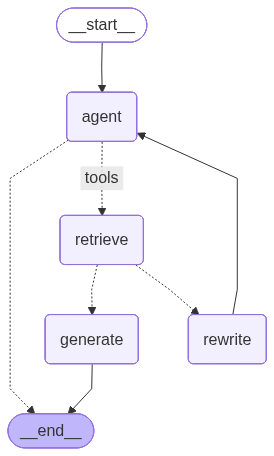

In [76]:
# Build Langgraph
from langgraph.prebuilt import ToolNode, tools_condition

builder = StateGraph(AgentState)

builder.add_node("agent", agent)
retrieve = ToolNode(tools=tools)
builder.add_node("retrieve", retrieve)
builder.add_node("rewrite", rewrite)
builder.add_node("generate", generate)

builder.set_entry_point("agent")
builder.add_conditional_edges(
    "agent",
    tools_condition,
    {
        "tools": "retrieve",
        END: END
    }
)

builder.add_conditional_edges(
    'retrieve',
    grade_documents
)

builder.add_edge("generate",END)
builder.add_edge("rewrite","agent")

graph = builder.compile()
graph

In [77]:
graph.invoke({"messages":"Retrieve information about Langgraph?"})

---CALL AGENT---
---CHECK RELEVANCE---
---DESISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='Retrieve information about Langgraph?', additional_kwargs={}, response_metadata={}, id='aa343336-9ee3-4ca1-8db7-e4bfe152560f'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'The user wants to retrieve information about Langgraph. We have a tool: retriever_langgraph_docs. We need to call that with query "Langgraph". We should use the function.', 'tool_calls': [{'id': 'fc_01d8c601-b6d4-4188-9710-ddabd88b228c', 'function': {'arguments': '{"query":"Langgraph"}', 'name': 'retriever_langgraph_docs'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 67, 'prompt_tokens': 172, 'total_tokens': 239, 'completion_time': 0.067438608, 'prompt_time': 0.011562657, 'queue_time': 0.047882222, 'total_time': 0.079001265, 'completion_tokens_details': {'reasoning_tokens': 39}}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_e99e93f2ac', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': No

In [78]:
graph.invoke({"messages":"Retrieve information about Langchain?"})

---CALL AGENT---
---CHECK RELEVANCE---
---DESISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='Retrieve information about Langchain?', additional_kwargs={}, response_metadata={}, id='d991542e-8450-427f-9852-f2ad607c4612'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'User wants to retrieve information about Langchain. We have a tool function retriever_vector_db_blog. Should call it with query "Langchain".', 'tool_calls': [{'id': 'fc_b9ebdbe1-53f0-48d5-b8ce-c2e07b3a4921', 'function': {'arguments': '{"query":"Langchain"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 58, 'prompt_tokens': 172, 'total_tokens': 230, 'completion_time': 0.058600068, 'prompt_time': 0.008372907, 'queue_time': 0.048347553, 'total_time': 0.066972975, 'completion_tokens_details': {'reasoning_tokens': 30}}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_e99e93f2ac', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'},

In [79]:
graph.invoke({"messages":"What is Machine learning?"})

---CALL AGENT---


{'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='2016956d-d4f7-45dc-807c-28e895a5fe68'),
  AIMessage(content='**Machine learning** is a branch of artificial intelligence that focuses on building systems that can learn from data, identify patterns, and make decisions or predictions without being explicitly programmed for every possible scenario.\n\n| Key Idea | What it Means |\n|----------|---------------|\n| **Learning from data** | Instead of hard‑coding rules, the system uses examples (training data) to infer relationships. |\n| **Pattern recognition** | Algorithms detect regularities or structures in data (images, text, numbers, etc.). |\n| **Generalization** | The model can apply what it has learned to new, unseen data. |\n| **Adaptation** | It can improve over time as more data become available or as the environment changes. |\n\n### Typical Workflow\n\n1. **Collect Data** – Gather relevant observations or measurements